In [2]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib as mpl 
import matplotlib.pyplot as plt

sys.path.insert(0, '../../icenumerics/')
sys.path.insert(0, './auxnumerics/')
import icenumerics as ice

import auxiliary as aux
import montecarlo_tools as mc
import chirality_tools as chir
from parameters import params
ureg = ice.ureg

%reload_ext autoreload
%autoreload 2

idx = pd.IndexSlice

In [3]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [9]:
longpath = '/media/eru/ina/stuckgs/data/simstair'
shortpath = '/media/eru/ina/stuckgs/data/simstair_short'
opdf_long = pd.read_csv(os.path.join(longpath,'orderparameters.csv'),index_col=['field','frame'])
opdf_short = pd.read_csv(os.path.join(shortpath,'orderparameters.csv'),index_col=['field','frame'])
fields = opdf_long.index.get_level_values('field').unique().to_list()

In [48]:
stuff = opdf_long.loc[idx[10,:]]['3'].to_numpy()
np.var(np.abs(stuff))

92.32888888888888

In [49]:
np.abs(stuff)

array([760., 784., 792., 782., 780., 800., 776., 776., 780., 776., 786.,
       784., 780., 796., 780., 776., 792., 780., 788., 768., 800., 784.,
       772., 788., 766., 772., 788., 780., 768., 776., 772., 792., 776.,
       788., 792., 794., 780., 784., 772., 788., 786., 772., 764., 778.,
       796., 776., 780., 792., 776., 780., 788., 780., 784., 794., 764.,
       774., 788., 780., 760., 780., 792., 780., 784., 768., 776., 784.,
       776., 776., 782., 768., 780., 784., 760., 772., 776., 784., 788.,
       792., 800., 792., 784., 788., 796., 788., 780., 784., 780., 760.,
       780., 776., 792., 788., 788., 790., 768., 784., 792., 784., 776.,
       780., 776., 772., 768., 768., 780., 784., 808., 776., 776., 784.,
       788., 796., 772., 792., 780., 792., 792., 788., 812., 768., 780.,
       768., 772., 776., 792., 776., 772., 772., 780., 772., 804., 774.,
       788., 760., 768., 776., 788., 798., 780., 772., 768., 780., 786.,
       784., 780., 780., 784., 784., 752., 784., 78

In [12]:
def op_mean(df):
    op = []

    for field, cpd in df.groupby('field'):

        ensemble_av = cpd.abs().mean(axis=1)
        time_av = ensemble_av.mean()

        op.append(time_av)

    return op

def op_var(df):
    op_var = []

    for field, cpd in df.groupby('field'):

        time_var = cpd.abs().var(axis = 0)
        ensemble_av = time_var.mean()

        op_var.append(ensemble_av)

    return op_var

In [13]:
longmean = op_mean(opdf_long)
shortmean = op_mean(opdf_short)

longvar = op_var(opdf_long)
shortvar = op_var(opdf_short)


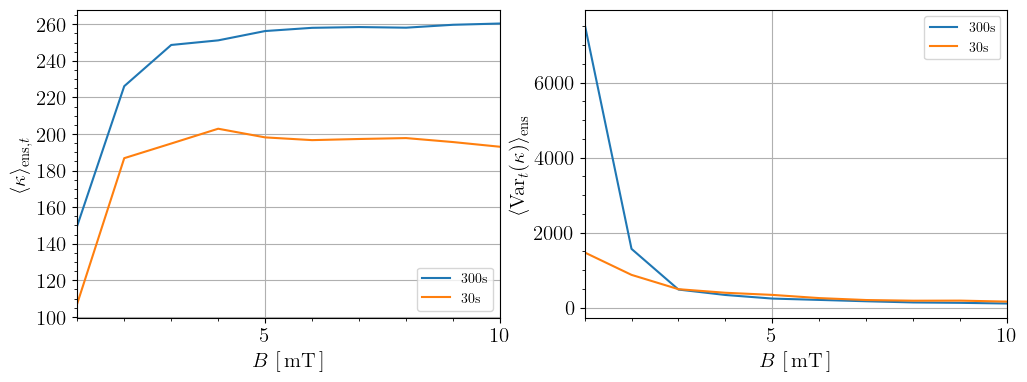

In [25]:
fig, axes = plt.subplots(1,2,figsize=(12,4))


ax = axes[0]
ax.plot(fields,longmean, label='300s')
ax.plot(fields,shortmean, label='30s')

ax.set_xlim(1,10)
#ax.set_ylim(min(op),500)
ax.set_xlabel("$B$ [\\,mT\\,]", fontsize=15)
ax.set_ylabel(r"$\langle \kappa \rangle_{\mathrm{ens},t}$",fontsize=15)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.xaxis.set_minor_formatter(plt.NullFormatter())


ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_formatter(plt.NullFormatter())

ax.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()
ax.legend()
ax.grid()

ax = axes[1]
ax.plot(fields,longvar, label='300s')
ax.plot(fields,shortvar, label='30s')

ax.set_xlim(1,10)
ax.set_xlabel("$B$ [\\,mT\\,]", fontsize=15)
# ax.set_ylabel(r"$\mathrm{Var}_t( \langle \kappa \rangle_\mathrm{ens} )$",fontsize=15)
ax.set_ylabel(r"$\langle \mathrm{Var}_t( \kappa ) \rangle_\mathrm{ens}$",fontsize=15)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.xaxis.set_minor_formatter(plt.NullFormatter())


# ax.yaxis.set_major_locator(plt.MultipleLocator(20))
# ax.yaxis.set_minor_locator(plt.NullLocator())
# ax.yaxis.set_minor_formatter(plt.NullFormatter())

ax.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()
ax.legend()
ax.grid()

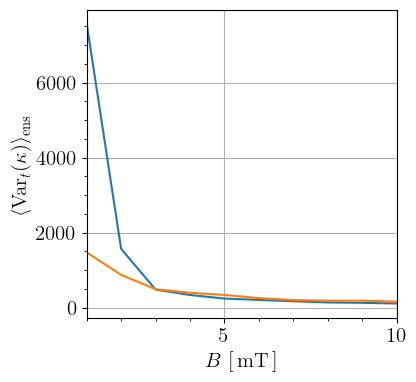

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(fields,longvar, label='300s')
ax.plot(fields,shortvar, label='30s')

ax.set_xlim(1,10)
ax.set_xlabel("$B$ [\\,mT\\,]", fontsize=15)
# ax.set_ylabel(r"$\mathrm{Var}_t( \langle \kappa \rangle_\mathrm{ens} )$",fontsize=15)
ax.set_ylabel(r"$\langle \mathrm{Var}_t( \kappa ) \rangle_\mathrm{ens}$",fontsize=15)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.xaxis.set_minor_formatter(plt.NullFormatter())


# ax.yaxis.set_major_locator(plt.MultipleLocator(20))
# ax.yaxis.set_minor_locator(plt.NullLocator())
# ax.yaxis.set_minor_formatter(plt.NullFormatter())

ax.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

ax.grid()